In [51]:
import h5py
import numpy as np

# Load the HDF5 .mat file
file_path = 'data/tra&val/data1999.mat'  # change as needed
with h5py.File(file_path, 'r') as f:
    print("Keys:", list(f.keys()))  # View available keys

    # Load and flatten both arrays
    m = np.array(f['m']).squeeze()
    d = np.array(f['d']).squeeze()

print("m shape:", m.shape)  # Should be (16384,)
print("d shape:", d.shape)  # Should be (1024,)


Keys: ['d', 'm']
m shape: (16384,)
d shape: (1024,)


In [52]:
# Reshape: 16 (Z) × 32 (Y) × 32 (X)
volume = m.reshape((16, 32, 32))
print("Volume shape:", volume.shape)


Volume shape: (16, 32, 32)


In [53]:
mask = (volume == 1000)

In [54]:
voxel_size = 50  # meters per voxel

x_edges = np.linspace(0, voxel_size * 32, 33)  # Easting edges (33 points for 32 voxels)
y_edges = np.linspace(0, voxel_size * 32, 33)  # Northing edges
z_edges = np.linspace(0, voxel_size * 16, 17)  # Depth edges


In [55]:
Z, Y, X = np.meshgrid(z_edges, y_edges, x_edges, indexing='ij')


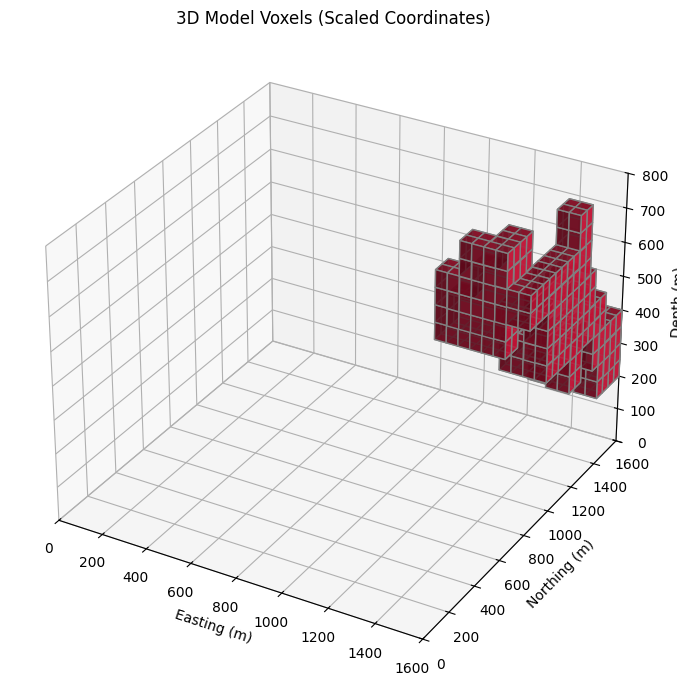

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot voxels where mask==True (volume == 1000)
ax.voxels(X, Y, Z, mask, facecolors='crimson', edgecolor='gray', alpha=0.8)

ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Depth (m)')
ax.set_title('3D Model Voxels (Scaled Coordinates)')

# Set axis limits to your domain
ax.set_xlim(0, voxel_size * 32)
ax.set_ylim(0, voxel_size * 32)
ax.set_zlim(0, voxel_size * 16)

plt.tight_layout()
plt.show()


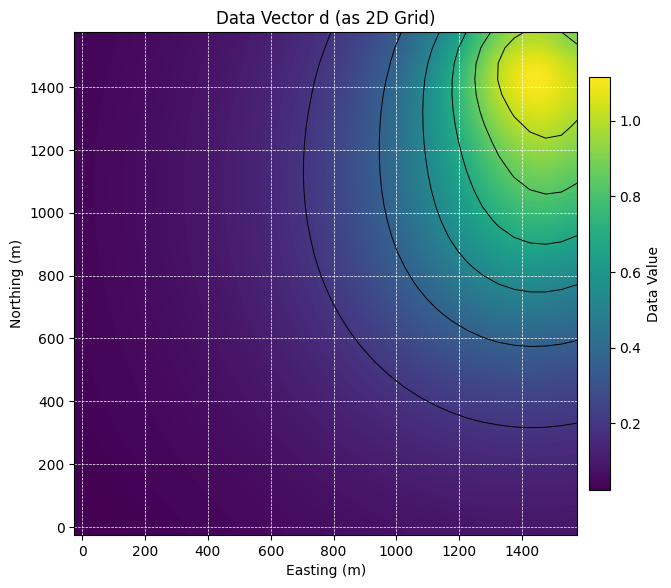

In [57]:
# Reshape d to 32x32 (surface station grid)
d_image = d.reshape((32, 32))

voxel_size = 50  # meters per pixel

plt.figure(figsize=(7, 6))

im = plt.imshow(d_image, cmap='viridis', origin='lower', interpolation='bicubic', aspect='equal')
plt.colorbar(im, label='Data Value', shrink=0.8, pad=0.02, aspect=20)

plt.title("Data Vector d (as 2D Grid)")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")

# Create ticks for every 4 indices, scaled by voxel size
tick_indices = np.arange(0, 33, 4)
tick_labels = tick_indices * voxel_size

plt.xticks(tick_indices, tick_labels)
plt.yticks(tick_indices, tick_labels)

# Add grid lines aligned with ticks
plt.grid(which='major', color='white', linestyle='--', linewidth=0.5)

# Add contour lines for better data visualization
contour_levels = np.linspace(np.min(d_image), np.max(d_image), 8)
plt.contour(d_image, levels=contour_levels, colors='black', linewidths=0.7, origin='lower')

plt.tight_layout()
plt.show()


In [50]:
print("Unique values in m:", np.unique(m))
print("Number of 1000s:", np.sum(m == 1000))
print("Volume shape:", volume.shape)


Unique values in m: [   0. 1000.]
Number of 1000s: 384
Volume shape: (16, 32, 32)
